In [5]:
import cv2
import numpy as  np
from matplotlib import pyplot as plt

In [14]:
# Bi-Linear interpolation
def Bi_linear(img, ax=1, ay =1):
    if len(img.shape) > 2:
        h, w, ch = img.shape
    else:
        h, w = img.shape
        ch = 1
    
    ah = int(ay * h)
    aw = int(ax * w)
    
    # get position of resized image
    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))
    
    # get position of original position
    y = (y / ay)
    x = (x / ax)
    
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    
    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)
    
    #get distance
    dx = x - ix
    dy = y - iy
    
    if ch > 1:
        dx = np.repeat(np.expand_dims(dx, axis=-1), ch, axis=-1)
        dy = np.repeat(np.expand_dims(dy, axis=-1), ch, axis=-1)
    
    # interpolation
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1-dy) * img[iy,ix+1] + (1-dx) * img[iy+1,ix] + dx * dy * img[iy+1,ix+1]
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

In [20]:
img = cv2.imread("../assets/imori.jpg", 0).astype(np.float)
print(img.shape)

(128, 128)


(256, 256)
(256, 256)


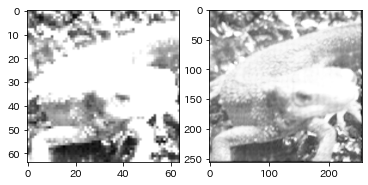

In [21]:
# Bilinear interpolation
out1 = Bi_linear(img, ax=0.5, ay=0.5)
print(out.shape)
# Bilinear interpolation
out2 =  Bi_linear(img, ax=2., ay=2.)
print(out.shape)
out = out.astype(np.uint8)
plt.subplot(121)
plt.imshow(out1, cmap="gray")
plt.subplot(122)
plt.imshow(out2, cmap="gray")

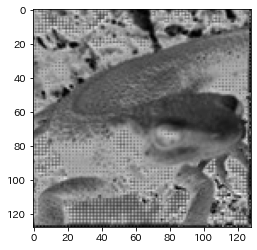

In [27]:
# Bilinear interpolation
out =  Bi_linear(out1, ax=2., ay=2.)
out = np.abs(out - img)
out = out / out.max() * 255
out = out.astype(np.uint8)
plt.imshow(out, cmap="gray")